['ECG1', 'ECG2']
    ECG1   ECG2      time
0 -0.505  0.615  0.000000
1 -0.495  0.755  0.007812
2 -0.545  0.805  0.015625
3 -0.445  0.865  0.023438
4 -0.275  0.815  0.031250
   ECG1  ECG2  time
0   NaN   NaN   NaN
1   NaN   NaN   NaN
2   NaN   NaN   NaN
3   NaN   NaN   NaN
4   NaN   NaN   NaN


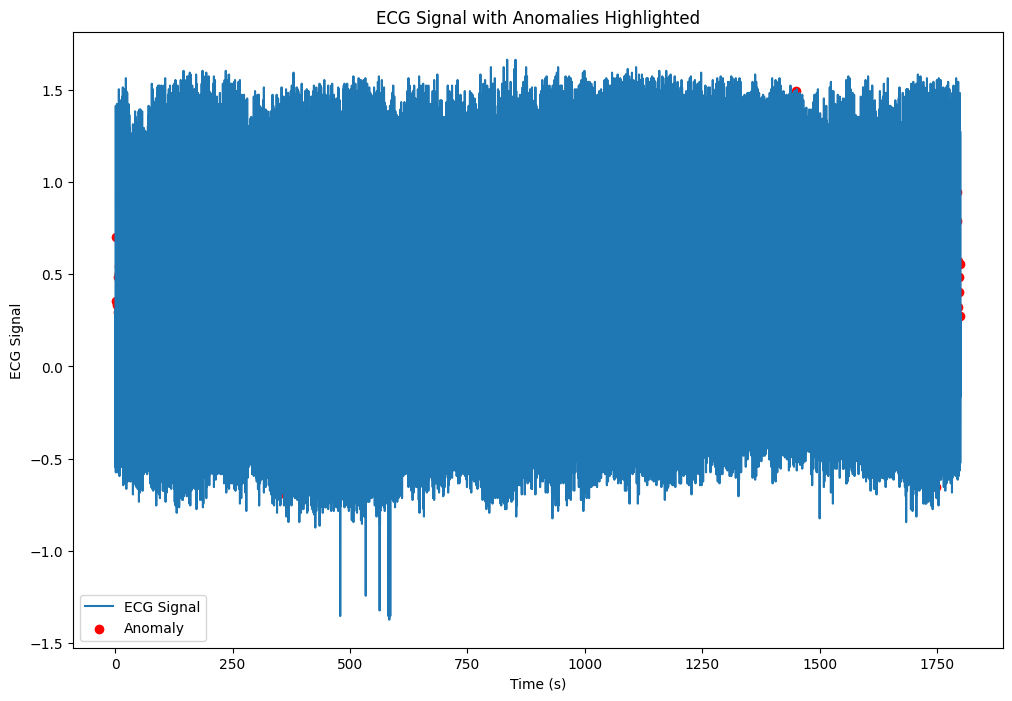

In [8]:
import wfdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the record and annotation
record = wfdb.rdrecord('C:\\Users\\maiqu\\Desktop\\Killian\\Research\\Datasets\\mit-bih-supraventricular-arrhythmia-database-1.0.0\\800')
annotation = wfdb.rdann('C:\\Users\\maiqu\\Desktop\\Killian\\Research\\Datasets\\mit-bih-supraventricular-arrhythmia-database-1.0.0\\800', 'atr')

print(record.sig_name)

# Convert the signal to a DataFrame
df = pd.DataFrame(record.p_signal, columns=record.sig_name)

# Add the time column
df['time'] = np.arange(len(df)) / record.fs

# Display the first few rows of the DataFrame
print(df.head())

# Define the window size (e.g., 5 seconds)
window_size = 5 * record.fs  # 5 seconds in samples

# Create sliding windows
windows = df.rolling(window=window_size)

# Example: Calculate the mean value within each window
window_means = windows.mean()

# Display the first few rows of the windowed data
print(window_means.head())

# Plot the data
plt.figure(figsize=(12, 8))

# Plot the ECG signal
plt.plot(df['time'], df['ECG1'], label='ECG Signal')

# Highlight anomalies
anomaly_times = annotation.sample / record.fs
plt.scatter(anomaly_times, df.loc[annotation.sample, 'ECG1'], color='red', label='Anomaly')

# Add labels and legend
plt.xlabel('Time (s)')
plt.ylabel('ECG Signal')
plt.title('ECG Signal with Anomalies Highlighted')
plt.legend()

# Show the plot
plt.show()